## Demo: NumPy array masking, indexing, selection

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean  

Background: https://numpy.org/doc/stable/reference/maskedarray.generic.html

### Masked array vs. np.nan
* Useful for representing nodata in raster datasets
* Useful for dynamically masking outliers for calculations without removing values or creating new arrays
* np.nan is float32 or float64, so if your original array is int8, much more efficient to use additional 1-bit mask than cast everything as float32

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.nan?

Type:        float
String form: nan
Docstring:   Convert a string or number to a floating point number, if possible.


In [ ]:
#a = np.random.random_integers(0,255,(10,10))
a = np.arange(100).reshape((10,10))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [ ]:
a.dtype

dtype('int64')

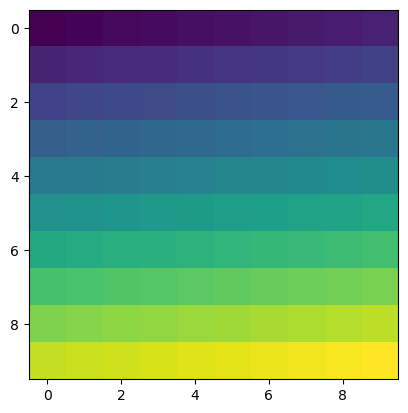

In [ ]:
plt.imshow(a);

### Create a boolean index

In [ ]:
#All False initially
idx = np.zeros_like(a).astype(bool)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

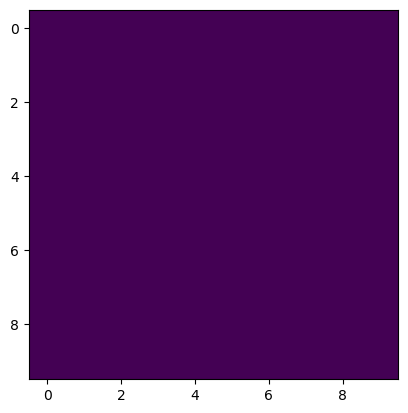

In [ ]:
plt.imshow(idx);
idx

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

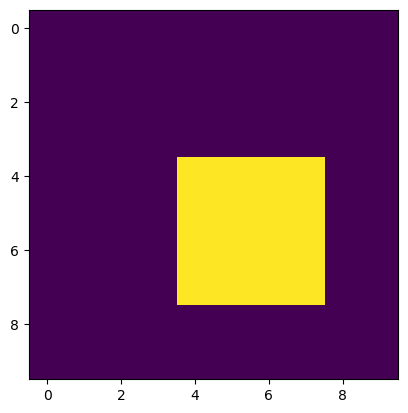

In [ ]:
#Set some values to True
idx[4:8,4:8] = True
plt.imshow(idx);
idx

### Sanity check with fancy indexing

In [ ]:
a[idx]

array([44, 45, 46, 47, 54, 55, 56, 57, 64, 65, 66, 67, 74, 75, 76, 77])

In [ ]:
a[~idx]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 48, 49, 50, 51, 52, 53, 58,
       59, 60, 61, 62, 63, 68, 69, 70, 71, 72, 73, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Create a masked array using the boolean mask

In [ ]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [ ]:
idx

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
b = np.ma.array(a, mask=idx)

In [ ]:
b

masked_array(
  data=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, --, --, --, --, 48, 49],
        [50, 51, 52, 53, --, --, --, --, 58, 59],
        [60, 61, 62, 63, --, --, --, --, 68, 69],
        [70, 71, 72, 73, --, --, --, --, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]],
  mask=[[False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False,  True,  True,  True,  True, False,
         False],
        [False, False, False, False,  True,  True,

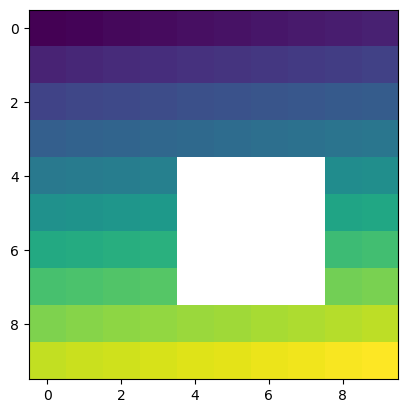

In [ ]:
plt.imshow(b);

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, 44, 45, 46, 47, --, --],
        [--, --, --, --, 54, 55, 56, 57, --, --],
        [--, --, --, --, 64, 65, 66, 67, --, --],
        [--, --, --, --, 74, 75, 76, 77, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True, False, False, False, False,  True,
          True],
        [ True,  True,  True,  True, Fal

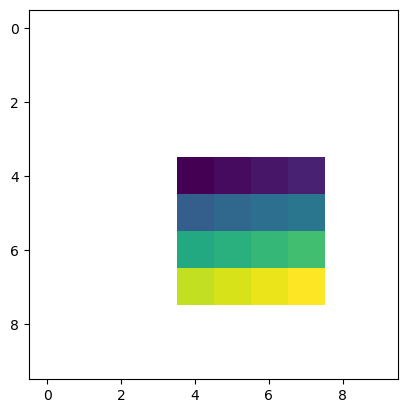

In [ ]:
c = np.ma.array(a, mask=~idx)
plt.imshow(c);
c

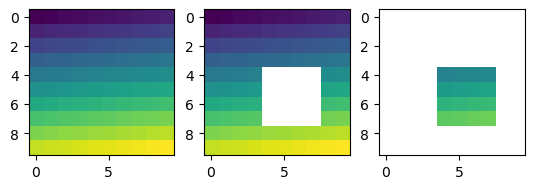

In [ ]:
f, axa = plt.subplots(1, 3)
m = axa[0].imshow(a, vmin=a.min(), vmax=a.max())
axa[1].imshow(b, vmin=a.min(), vmax=a.max())
axa[2].imshow(c, vmin=a.min(), vmax=a.max())
#plt.colorbar(m, ax=axa[2])

### Compute statistics for unmasked values

In [ ]:
a.mean()

49.5

In [ ]:
b.mean()

47.404761904761905

In [ ]:
b.compressed()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 48, 49, 50, 51, 52, 53, 58,
       59, 60, 61, 62, 63, 68, 69, 70, 71, 72, 73, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
c.mean()

60.5

In [ ]:
c.compressed()

array([44, 45, 46, 47, 54, 55, 56, 57, 64, 65, 66, 67, 74, 75, 76, 77])

In [ ]:
#Sanity check - all original values are still preserved in masked array
#a == b.data